# Лабораторная работа №3

Данная лабораторная предназначена для ознакомления с основными модулями Python используемыми в анализе данных.

NumPy - модуль предназначенный для работы с многомерными массивами. Почитать можно [здесь](https://pythonworld.ru/numpy)

Matplotlib - пакет модулей предназначенный для визуализации данных. Почитать можно [здесь](https://pythonworld.ru/novosti-mira-python/scientific-graphics-in-python.html)

Pandas - модуль для анализа данных и поддерживающий их табличное представление. Почитать можно [здесь](https://pythonworld.ru/obrabotka-dannyx/pandas-cookbook-1-csv-reading.html)

Для углубленного изучения можно почитать книгу J. VanderPlas Python Data science Handbook


## NumPy

Данный модуль создан для ускорения работы с массивами больших размерностей. Для примера рассмотрим сравнение скорости подсчета суммы случайного ряда при помощи встроенных инструментов и инструментов numpy:

In [8]:
# импортируем модуль и создадим ему короткий псевдоним для удобства обращения к нему
import numpy as np

# импортируем этот модуль для генерации случайных данных
import random

In [9]:
# создадим список длиной 10_000 случайных целых чисел в диапазоне от -10_000 до 10_000
arr = random.sample(range(-10_000, 10_000),k=10_000)

In [ ]:
# Подсчитаем время исполнения ячейки при помощи волшебного оператора %%time

In [14]:
%timeit sum(arr)

61.7 μs ± 605 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
# Подсчитаем теперь преобразованный список в NumPy-массив при помощи np.sum()

In [17]:
arr_2 = np.array(arr)

In [16]:
%timeit np.sum(arr_2)

3.17 μs ± 77 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Как видно алгоритм подсчет суммы ускоряется почти в 20 раз

NumPy позволяет создавать различного рода матрицы в одно действие:

In [13]:
#создать матрицу размерности 2х2 заполненную нулями
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [ ]:
#создать матрицу размерности 3х2 заполненную единицами
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# размерность массива можно посмотреть вызвав поле shape у np.array

a = np.array([[1, 2], [3, 4], [5, 6]])

print(a)
print(a.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [ ]:
# len вернет нам вернет размер по первому измерению

print(len(a))

3


### Задание

Найдите в документации numpy функции для создания диагональной матрицы и заполнения матрицы пользовательским числом.

1) Создайте диагональную единичную матрицу размерности 5х5

2) Создайте матрицу размерности 4х4 заполненную тройками

In [181]:
import numpy.typing as npt

diag_matrix: npt.ArrayLike = np.eye(5)
three_matrix: npt.ArrayLike = 3 * np.ones((4, 4))
print(diag_matrix)
print(three_matrix)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]


Массивы можно транспонировать и изменять размерности

In [183]:
a = np.array([[1,2],[3,4],[5,6]])
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
print(a.reshape((2,3)))

[[1 2 3]
 [4 5 6]]


In [ ]:
print(a.T)

[[1 3 5]
 [2 4 6]]


In [ ]:
# можно так же расплющить массив в одномерный
print(a.flatten())

[1 2 3 4 5 6]


### Задание
Создайте матрицу (любым известным вам способом) размерности 2х3х4 и транспонируйте ее. Попробуйте поменять очередность осей (по сути если представить трехмерную матрицу как куб, то это будет поворотом в пространстве на какой-то из боков) при помощи transpose

In [ ]:
cube_matrix: npt.ArrayLike = np.ones((2, 3, 4))

print(cube_matrix.shape)
print(cube_matrix.T.shape)
print(cube_matrix.transpose((1, 0, 2)).shape)

(2, 3, 4)
(4, 3, 2)
(3, 2, 4)


Массивы можно объединять и добавлять новые оси

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])

In [ ]:
print(np.concatenate((a,b)))

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
print('old matrix')
print(a)
print(a.shape, '\n') # отступим строку

print('new matrix')
b = a[:,:,np.newaxis]
print(b)
print(b.shape)

old matrix
[[1 2]
 [3 4]]
(2, 2) 

new matrix
[[[1]
  [2]]

 [[3]
  [4]]]
(2, 2, 1)


### Задание
Создайте матрицу размерности 3х4 и продублируйте ее так, чтобы ее размерность стала 2х3х4 (понадобится newaxis и concatenate или при помощи squeeze)

In [184]:
matrix_2d: npt.ArrayLike = np.ones((3, 4))
matrix_3d: npt.ArrayLike = np.tile(matrix_2d, (2, 1, 1))

print(matrix_3d.shape)

(2, 3, 4)


### Операции над матрицами

In [ ]:
# можно передавать тип данных, к которому требуется привести элементы матрицы, в данном случае float
a = np.array([[1,2],[3,4]], float)
# создадим единичную матрицу (на главной диагонали лежат единицы, все остальные элементы равны нулю)
b = np.eye(2,2)

print(a, '\n')
print(b)

[[1. 2.]
 [3. 4.]] 

[[1. 0.]
 [0. 1.]]


In [ ]:
a + b

array([[2., 2.],
       [3., 5.]])

In [ ]:
a - b

array([[0., 2.],
       [3., 3.]])

умножение матриц через операнд * работает как поэлементное умножение

In [ ]:
a * b

array([[1., 0.],
       [0., 4.]])

матрицу можно домножать на скаляр

In [ ]:
a * 10

array([[10., 20.],
       [30., 40.]])

и проводить все базовые математические операции со скалярами поэлементно

In [ ]:
a // 3

array([[0., 0.],
       [1., 1.]])

Для матричного перемножения используется метод dot()

In [ ]:
# т.к. при умножение на единичную матрицу исходная матрица не меняется
a.dot(b)

array([[1., 2.],
       [3., 4.]])

### Задание

Создайте две матрицы размерности 2х3 и 3х2, перемножьте их

In [189]:
matrix_A: npt.ArrayLike = np.array([[1,2],[3,4],[5,6]])
matrix_B: npt.ArrayLike = np.array([[1,2,3],[4,5,6]])

print(np.matmul(matrix_A, matrix_B))

[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


К массивам применимы те же операции, что и для списков. Их можно вызывать либо у массива, как метод, либо как функцию из numpy

In [ ]:
a = np.array([[1,2],[3,4]])

print(a.max())
print(np.max(a))

4
4


### Задание

Используя возможности numpy (БЕЗ SET) напишите функции, которые принимают заданный массив чисел и возвращают:

1) список уникальных значений

2) кортеж из среднего, максимального и минимального

In [202]:
arr: npt.ArrayLike = np.array([1,2,3,4,5,6,7,8,8,8,9,2,3,4,17])

def unique_values(arr: npt.ArrayLike) -> npt.ArrayLike:
    return np.unique(arr)


def mean_max_min(arr: npt.ArrayLike) -> npt.ArrayLike:
    return (np.average(arr), np.max(arr), np.min(arr))

In [203]:
# тут менять ничего не нужно, просто исполнить ячейку
print(unique_values(arr))
print(mean_max_min(arr))

[ 1  2  3  4  5  6  7  8  9 17]
(np.float64(5.8), np.int64(17), np.int64(1))


## Matplotlib

Данная библиотека используется для визуального представления данных (графики, гистограммы, изображения и т.д.)

In [204]:
# импортируем модуль pyplot из пакета matplotlib и дадим общепринятое сокращенное имя plt
from matplotlib import pyplot as plt

Рассмотрим для примера отрисовку графика синусоиды

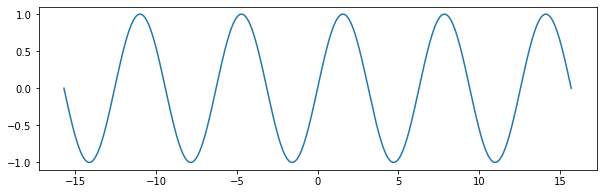

In [ ]:
# зададим функцию для подсчета значения синуса в точке
def func(x):
    return np.sin(x)

# при помощи linspace создадим массив значений в 1000 шагов от минус 5Пи до плюс 5пи
x = np.linspace(-np.pi * 5, np.pi * 5, 1000)

# зададим параметр пропорций и размеров нашего графика (можете поменять эти значения или вообще удалить эту строчку для интереса)
plt.figure(figsize=(10,3))
# выведем график при помощи функции plot
plt.plot(x, func(x))

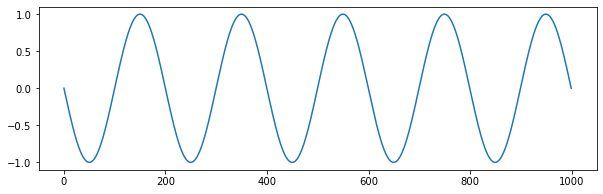

In [ ]:
# в аргументы передается сначала значения оси Х (можно не задавать), а потом значения по оси Y

# обратите внимание на значения оси Х, которые мы сами не задаем
plt.figure(figsize=(10,3))
plt.plot(func(x))

графики можно накладывать друг на друга, менять цвета и тип линии

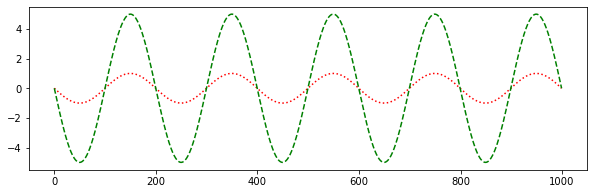

In [ ]:
plt.figure(figsize=(10,3))

plt.plot(func(x), color='red', linestyle=':')
plt.plot(func(x)*5, color='green', linestyle='--')

### Задание
Постройте графики функции x^2+2x-1 и ее производной синего и оранжевого цвета соответственно

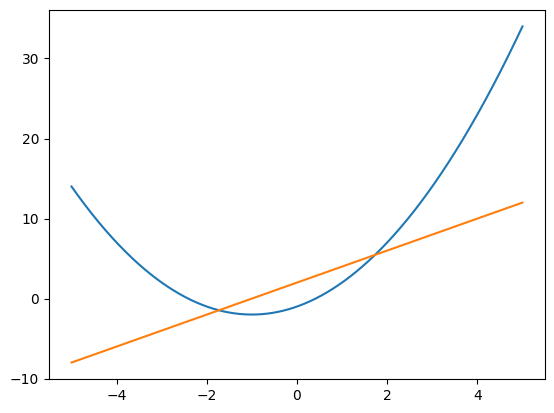

In [210]:
f = lambda x: pow(x,2)+2*x-1
x = np.linspace(-5, 5, 1000)

plt.plot(x, f(x))
plt.plot(x, np.gradient(f(x), x))

При помощи imshow можно смотреть на тепловые (высотные) карты двумерных данных. Например значения функций двух переменных или изображения.

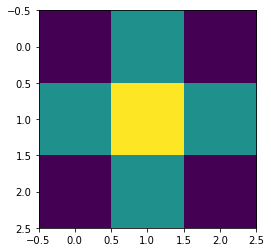

In [ ]:
arr = np.array([[0,1,0],[1,2,1],[0,1,0]])
plt.imshow(arr)

При помощи hist можно отобразить сравнительное графическое представление данных в виде гистограммы.

Указывая количество бинов, мы можем регулировать промежутки на которых будут формироваться столбцы

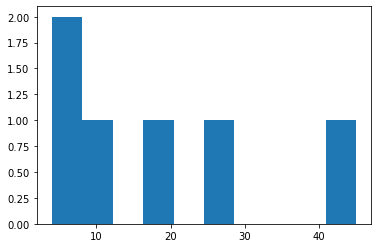

In [ ]:
data = np.array([10,4,26,17,8,45])

plt.hist(data, bins=10)
plt.show()

## Pandas

Pandas позволяет обрабатывать и анализировать данные. Можно провести аналогию с Excel.
В данном разделе рассмотрим основные возможности (т.к. библиотека крайне объемная и всю документацию будет физически невозможно сюда уместить)

In [211]:
# Импортируем библотеку pandas и дадим ей сокращенное общепринятое имя pd
import pandas as pd

Pandas позволяет считывать табличные данные из файлов в форматах .csv, .xml, .xlsx, .json и т.д.

Скачаем для примера классический датасет с информацией о пассажирах титаника.

Линк на датасет: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

In [212]:
"""
Загрузим данный датасет.
т.к. он в формате .csv то воспользуемся функцией read_csv()
в которой укажем относительный путь к этому файлу
"""
df = pd.read_csv('lab_3_titanic.csv')

In [213]:
# посмотрим первые 10 записей
df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [215]:
# то же самое можно сделать и так
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Задание
Выведите последние 10 строк таблицы

In [217]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Как видим, в таблице имеются столбцы, означающие некоторые признаки:
- PassengerId: уникальный идентификатор пассажира в данном наборе данных
- Survived: 0 - погиб, 1 - выжил
- Pclass: класс обслуживания пассажира
- Name: ФИО пассажира (как был записан в документах)
- Sex: пол пассажира
- Age: возраст пассажира
- SibSp: сколько братьев/сестер или супругов на борту
- Parch: сколько детей/родителей на борту
- Ticket: номер билета
- Fare: пассажирский тариф
- Cabin: номер каюты
- Embarked: порт погрузки. C - Cherbourg, Q - Queenstown, S - Southampton

In [ ]:
# Получить список столбцов можно при помощи следующей функции
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Краткую статистику по всем данным можно получить при помощи метода describe().

Она будет посчитана только для тех признаков, которые представлены численно.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Информацию по типам данных и количеству пропусков можно посмотреть при помощи info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Можно применять различные встроенные методы к определенным признакам, обращаясь двумя равнозначными способами:

In [ ]:
df.Survived.mean()

0.3838383838383838

In [ ]:
df['Survived'].mean()

0.3838383838383838

### Задание
Выведите максимальный и минимальный возраст пассажиров

In [221]:
print(df.Age.max())
print(df.Age.min())

80.0
0.42


### Задание
Воспользуйтесь встроенным методом value_counts для признака Pclass.

In [222]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Для получения конкретной строки можно использовать индексацию:

In [ ]:
df.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

### Задание
Выведите номер билета у 120-го пассажира

In [225]:
df.Ticket[120]

'S.O.C. 14879'

Возможно применение фильтрации для данных по какому-либо условию:

In [ ]:
# посмотрим все данные пассажиров, которые старше 50
df[df.Age > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


### Задание
Выведите имена всех мужчин в виде списка

In [226]:
print(df.Name[df.Sex == 'male'])

0             Braund, Mr. Owen Harris
4            Allen, Mr. William Henry
5                    Moran, Mr. James
6             McCarthy, Mr. Timothy J
7      Palsson, Master. Gosta Leonard
                    ...              
883     Banfield, Mr. Frederick James
884            Sutehall, Mr. Henry Jr
886             Montvila, Rev. Juozas
889             Behr, Mr. Karl Howell
890               Dooley, Mr. Patrick
Name: Name, Length: 577, dtype: object


Можно использовать встроенные графики для отображения данных

<AxesSubplot:>

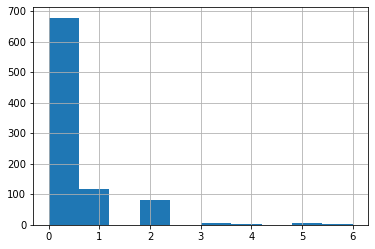

In [ ]:
df.Parch.hist()

### Задание
Постройте гистограмму на которой будет отображено количество людей в каждом из классов обслуживания

<Axes: >

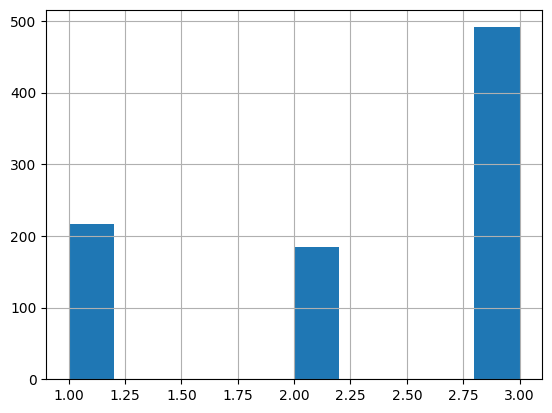

In [228]:
df.Pclass.hist()


Из датафрейма можно выделять подвыборки и делать их самостоятельными датафреймами:

In [ ]:
# Выделим в отдельную таблицу всех женщин
df_2 = df[df.Sex == 'female']
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [238]:
# Выделим датафрейм хранящий только имена и возраст
df_3 = df[['Name', 'Age']]
df_3

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


### Задание
Создайте датафрейм где будут поля Name и Survived для пассажиров без детей

In [245]:
dataframe = df[['Name', 'Survived']][df.Age > 18]
print(dataframe)

                                                  Name  Survived
0                              Braund, Mr. Owen Harris         0
1    Cumings, Mrs. John Bradley (Florence Briggs Th...         1
2                               Heikkinen, Miss. Laina         1
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)         1
4                             Allen, Mr. William Henry         0
..                                                 ...       ...
885               Rice, Mrs. William (Margaret Norton)         0
886                              Montvila, Rev. Juozas         0
887                       Graham, Miss. Margaret Edith         1
889                              Behr, Mr. Karl Howell         1
890                                Dooley, Mr. Patrick         0

[575 rows x 2 columns]


Для преобразования значений столбца можно применять метод .apply с указанием в нем функции, применяемой к значению каждой строки. В данном примере применяется анонимная функция (лямбда-функция).

In [ ]:
df['isAdult'] = df['Age'].apply(lambda x: x > 18)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


### Задание
Посчитайте среднее значение цены билета на корабле. Введите новый столбец, который будет показывать дешевле или дороже средней цены был купленный билет у каждого человека. Можете заполнить поля значениями True/False или строчными представлениями "дешевле"/"дороже"

In [252]:
average_ticket_cost = df.Fare.mean()

dataframe = pd.DataFrame(df.Fare.apply(lambda cost: cost < average_ticket_cost))

print(dataframe)

      Fare
0     True
1    False
2     True
3    False
4     True
..     ...
886   True
887   True
888   True
889   True
890   True

[891 rows x 1 columns]
